In [4]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

2113536/2110848 [==============================] - 2s 1us/step


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 106us/step - loss: 2.6859 - accuracy: 0.4967 - val_loss: 1.7392 - val_accuracy: 0.6230
Epoch 2/20
7982/7982 [==============================] - ETA: 0s - loss: 1.4437 - accuracy: 0.69 - 1s 73us/step - loss: 1.4430 - accuracy: 0.6989 - val_loss: 1.3073 - val_accuracy: 0.7140
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.0675 - accuracy: 0.7740 - val_loss: 1.1469 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 74us/step - loss: 0.8277 - accuracy: 0.8242 - val_loss: 1.0409 - val_accuracy: 0.7850
Epoch 5/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.6570 - accuracy: 0.8587 - val_loss: 0.9541 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - ETA: 0s - loss: 0.5178 - accuracy: 0.89 - 1s 75us/step - loss: 0.5198 - accuracy: 0.8928 - val_loss: 0.9201 - val_accuracy: 0.8

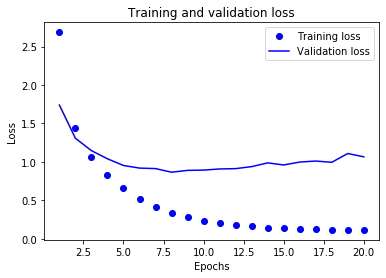

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

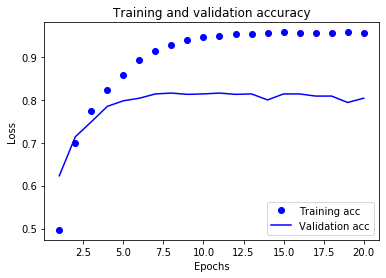

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 87us/step - loss: 2.4702 - accuracy: 0.5365 - val_loss: 1.6495 - val_accuracy: 0.6510
Epoch 2/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.3643 - accuracy: 0.7172 - val_loss: 1.2727 - val_accuracy: 0.7340
Epoch 3/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.0208 - accuracy: 0.7861 - val_loss: 1.1138 - val_accuracy: 0.7680
Epoch 4/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.8141 - accuracy: 0.8302 - val_loss: 1.0170 - val_accuracy: 0.7900
Epoch 5/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.6553 - accuracy: 0.8604 - val_loss: 0.9780 - val_accuracy: 0.7900
Epoch 6/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.5302 - accuracy: 0.8886 - val_loss: 0.9191 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.4332 - acc

In [25]:
results

[1.0135457959434122, 0.7862867116928101]

In [26]:
predictions = model.predict(x_test)

In [27]:
np.sum(predictions[0])

1.0000005

In [28]:
np.argmax(predictions[0])

3